<a href="https://colab.research.google.com/github/sejalbahirat/Movie_Box_Office_Prediction/blob/main/Movie_Collection_Prediction__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ignore Warnings
import warnings

# Importing required libraries
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CSV Files/movie_collection.csv')
data.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,395,NO


In [ ]:
# To check the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           506 non-null    int64  
 1   Marketing expense    506 non-null    float64
 2   Production expense   506 non-null    float64
 3   Multiplex coverage   506 non-null    float64
 4   Budget               506 non-null    float64
 5   Movie_length         506 non-null    float64
 6   Lead_ Actor_Rating   506 non-null    float64
 7   Lead_Actress_rating  506 non-null    float64
 8   Director_rating      506 non-null    float64
 9   Producer_rating      506 non-null    float64
 10  Critic_rating        506 non-null    float64
 11  Trailer_views        506 non-null    int64  
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
# Dimension of the data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')
print()

The data has 506 rows and 18 columns.



In [ ]:
# Count numerical and categorical features
num_features = sum(data.dtypes != 'O')
cat_features = sum(data.dtypes == 'O')

print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'The dataset has {num_features} numerical features and {cat_features} categorical features')

# Calculate and print percentage of missing values
print('\nPERCENTAGE OF MISSING VALUES:')
missing_values = data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print('There are no missing values in the dataset')
else:
    for feature, percentage in missing_values.items():
        print(f"The feature '{feature}' has {percentage:.2f}% missing values")

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 16 numerical features and 2 categorical features

PERCENTAGE OF MISSING VALUES:
The feature 'Time_taken' has 2.37% missing values


In [ ]:
# Fill missing quantitative feature with median
data['Time_taken'].fillna(data['Time_taken'].median(), inplace=True)

# Calculate and print percentage of missing values after filling
print('\nPERCENTAGE OF MISSING VALUES AFTER FILLING:')
missing_values = data.isnull().mean() * 100

if missing_values.any():
    for feature, percentage in missing_values.items():
        if percentage > 0:
            print(f"The feature '{feature}' has {percentage:.2f}% missing values")
else:
    print('There are no missing values in the dataset')


PERCENTAGE OF MISSING VALUES AFTER FILLING:
There are no missing values in the dataset


In [ ]:
# Looking for duplicates in the dataset
drows, dcolumns = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if drows==0 else f'There are {drows} duplicates in the dataset.')

There are no duplicates in the dataset.


In [ ]:
# Number of unique categorical features
unique_counts = data.select_dtypes(include='object').nunique()

for feature, count in unique_counts.items():
    if count == 1:
        print(f'** {feature} has 1 unique value **')
    else:
        print(f'{feature} has {count} unique values')

Genre has 4 unique values
3D_available has 2 unique values


In [ ]:
# Number of unique numerical features
unique_counts = data.select_dtypes(exclude='object').nunique()

for feature, count in unique_counts.items():
    if count == 1:
        print(f'** {feature} has 1 unique value **')
    else:
        print(f'{feature} has {count} unique values')

Collection has 228 unique values
Marketing expense has 504 unique values
Production expense has 76 unique values
Multiplex coverage has 81 unique values
Budget has 446 unique values
Movie_length has 356 unique values
Lead_ Actor_Rating has 339 unique values
Lead_Actress_rating has 354 unique values
Director_rating has 339 unique values
Producer_rating has 353 unique values
Critic_rating has 74 unique values
Trailer_views has 504 unique values
Time_taken has 449 unique values
Twitter_hastags has 423 unique values
Avg_age_actors has 42 unique values
Num_multiplex has 293 unique values


# Observation on Target Variable

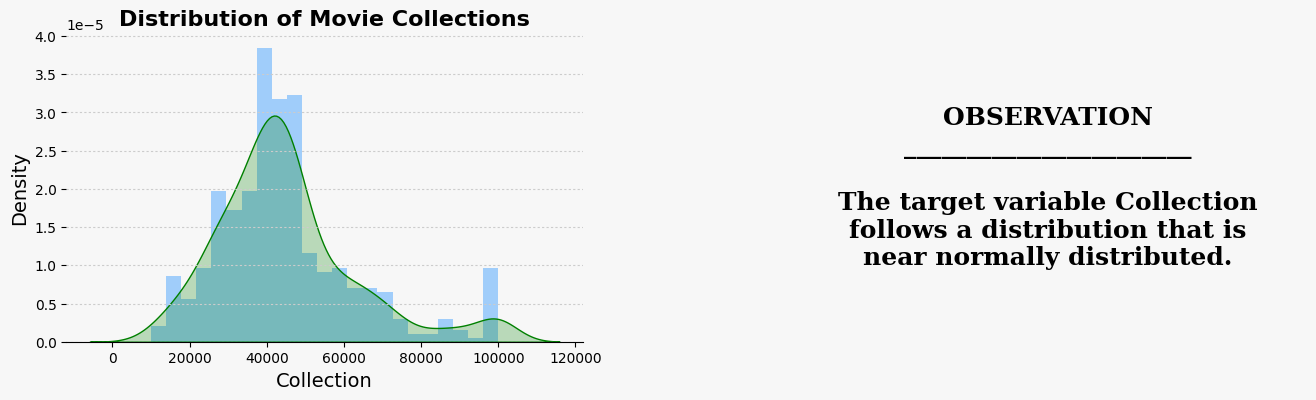

In [ ]:
 # Create figure and subplots
fig = plt.figure(figsize=(16, 4))
spec = fig.add_gridspec(1, 2)
spec.update(wspace=0.4, hspace=0.4)
sec_1 = plt.subplot(spec[0, 0])
sec_2 = plt.subplot(spec[0, 1])

# Set background color
bg_color = '#f7f7f7'
fig.patch.set_facecolor(bg_color)
sec_1.set_facecolor(bg_color)
sec_2.set_facecolor(bg_color)

sns.distplot(data['Collection'], color='dodgerblue', ax= sec_1, hist=True, kde_kws={'fill':'True', 'color':'g'})
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

# Style the grid and axis
sec_1.grid(color='#cccccc', linestyle=':', linewidth=0.8, axis='y', zorder=0, dashes=(2, 2))
sec_1.set_title('Distribution of Movie Collections', fontsize=16, weight='bold')
sec_1.set_xlabel('Collection', fontsize=14)
sec_1.set_ylabel('Density', fontsize=14)

# Add observation text
sec_2.text(0.5, 0.5, 'OBSERVATION\n_______________________\n\n'
                     'The target variable Collection\n'
                     'follows a distribution that is\n'
                     'near normally distributed.',
           ha='center', va='center', size=18, family='serif', weight='bold')

# Hide axes in the observation subplot
sec_2.axis('off')

# Remove spines
for selection in [sec_1, sec_2]:
    for location in ['top', 'right', 'left']:
        selection.spines[location].set_visible(False)

# Display the plot
plt.show()

## Univariate Analysis on Numerical Features

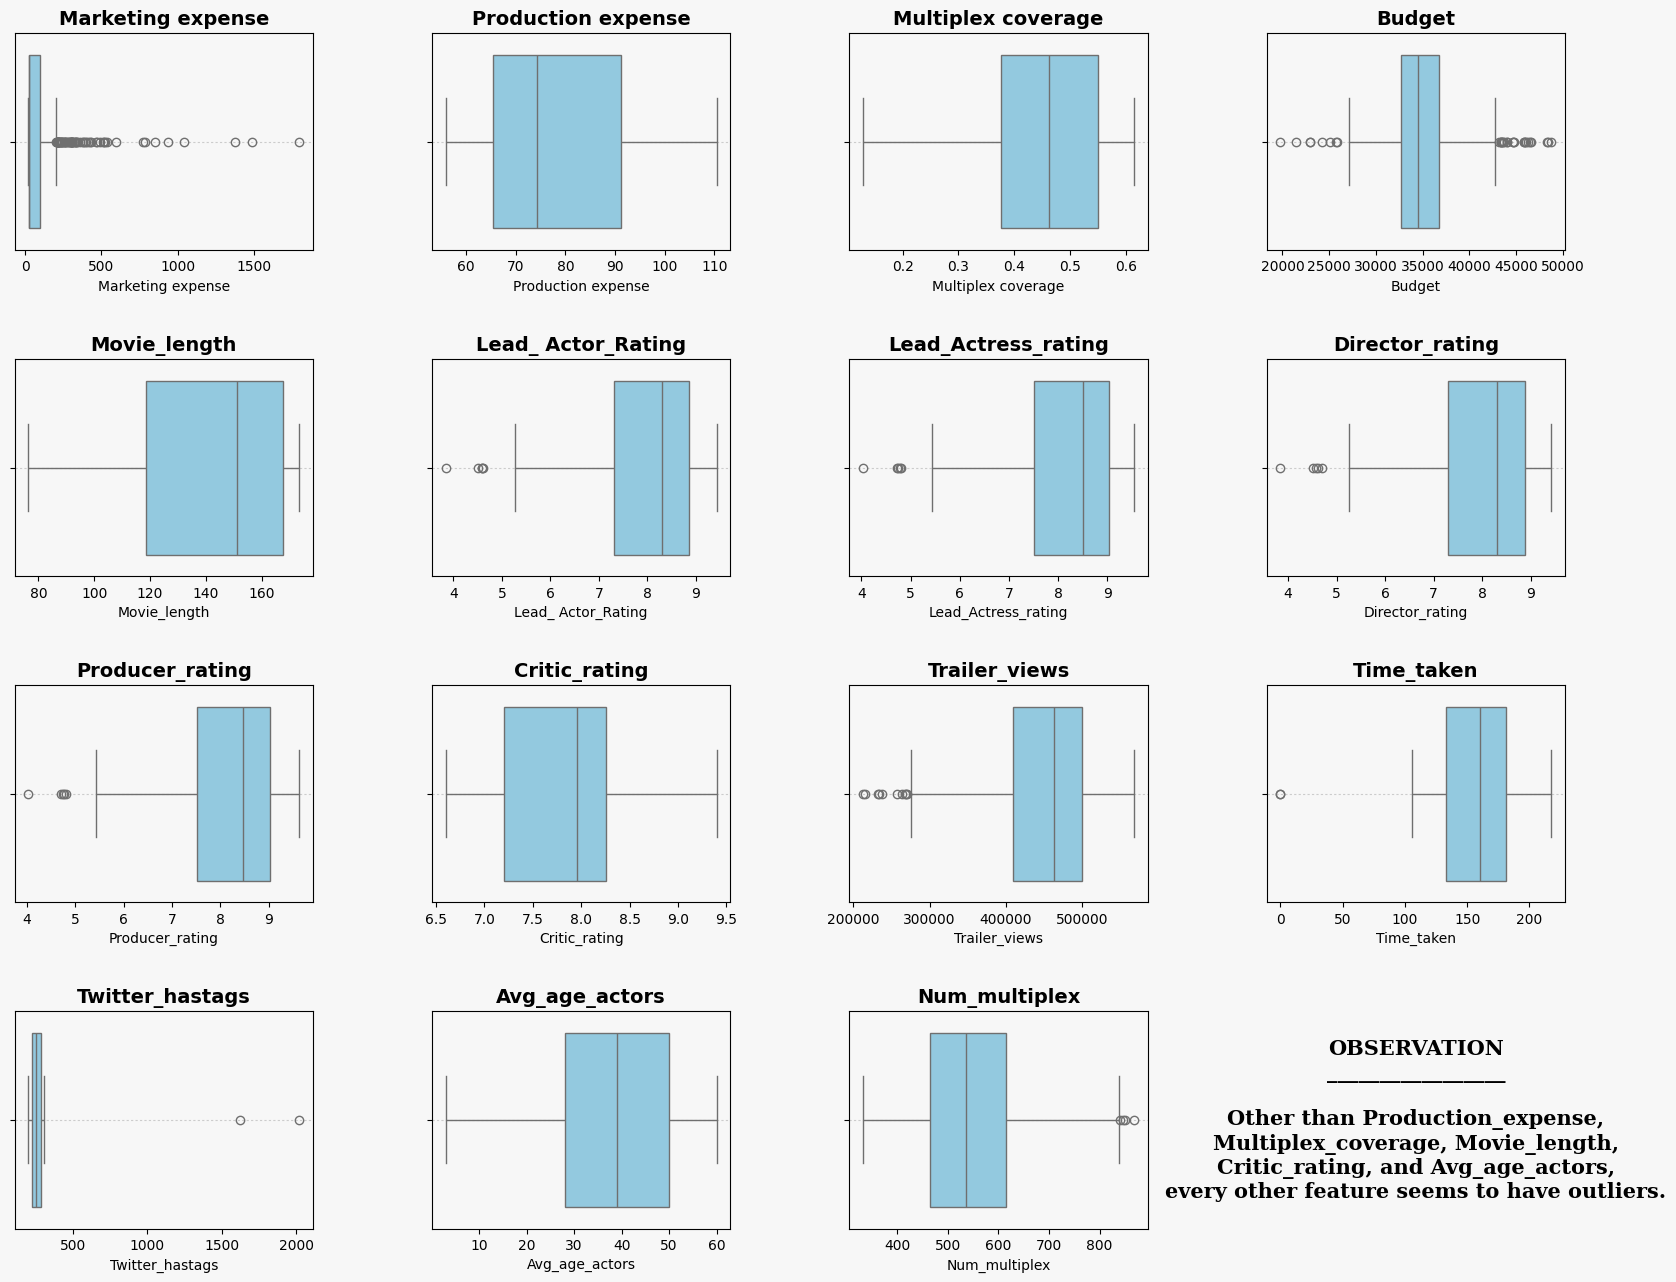

In [ ]:
# Create figure and subplots
fig = plt.figure(figsize=(20, 24))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.4, hspace=0.5)

# Create subplots
subplots = [fig.add_subplot(spec[i, j]) for i in range(4) for j in range(4)]
bg_color = '#f7f7f7'

# Set background color
fig.patch.set_facecolor(bg_color)
for subplot in subplots:
    subplot.set_facecolor(bg_color)

# Plotting the graphs
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        sns.boxplot(x=data[feature], ax=subplots[cnt], color='skyblue')
        subplots[cnt].set_title(feature, fontsize=14, weight='bold')
        subplots[cnt].grid(color='#cccccc', linestyle=':', linewidth=0.8, axis='y', zorder=0, dashes=(2, 2))
        cnt += 1

# Observation text
observation_text = ("OBSERVATION\n_________________\n\n"
                    "Other than Production_expense,\n"
                    "Multiplex_coverage, Movie_length,\n"
                    "Critic_rating, and Avg_age_actors,\n"
                    "every other feature seems to have outliers.")
subplots[-1].text(0.5, 0.5, observation_text, ha='center', va='center', size=15, family='serif', weight='bold')
subplots[-1].axis('off')

# Remove spines from the observation subplot (Negative Indexing)
subplots[-1].spines['top'].set_visible(False)
subplots[-1].spines['right'].set_visible(False)
subplots[-1].spines['bottom'].set_visible(False)
subplots[-1].spines['left'].set_visible(False)

# Display the plot
plt.show()


# Univariate and Bivariate Analysis on Categorial Features

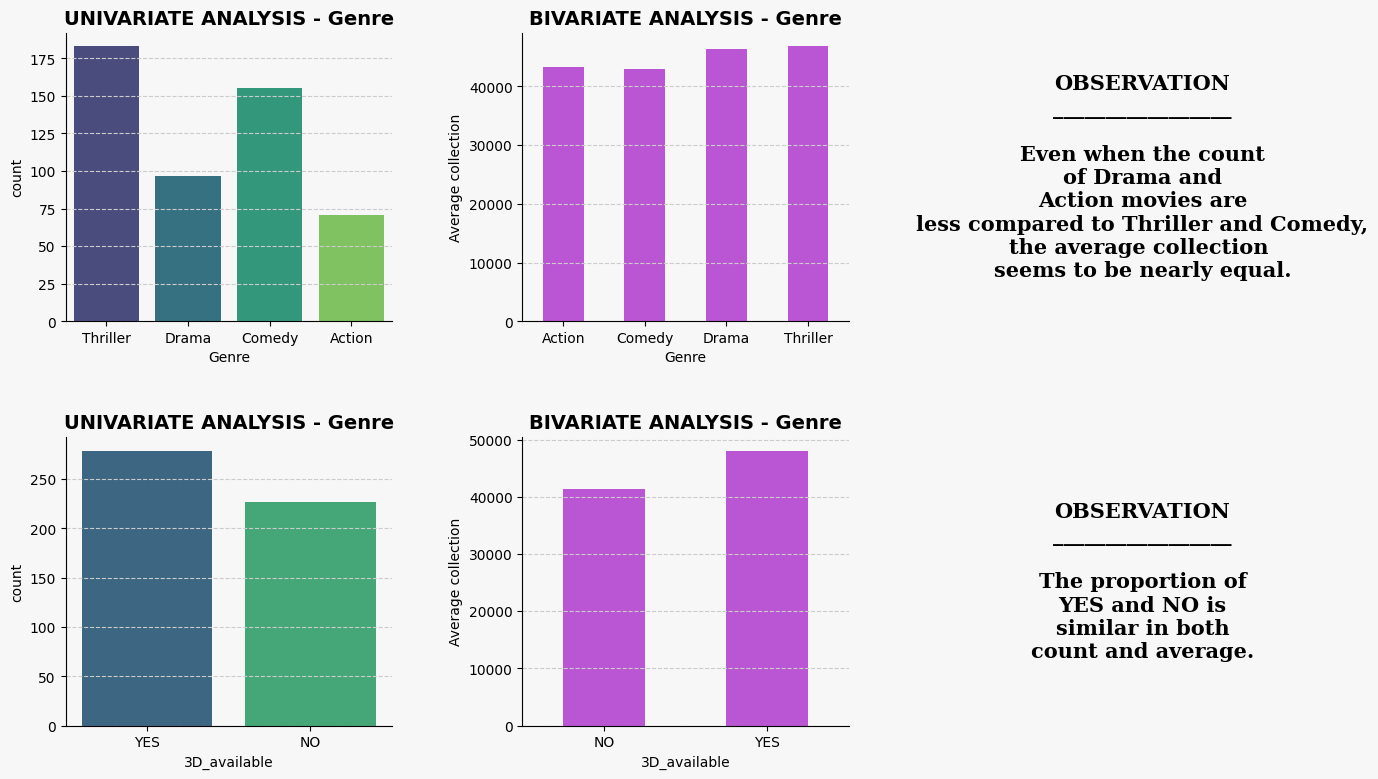

In [ ]:
# Creating plot structure
fig = plt.figure(figsize=(16, 30))
spec = fig.add_gridspec(6, 3)
spec.update(wspace=0.4, hspace=0.4)

# Create subplots
sec_01 = fig.add_subplot(spec[0, 0])
sec_02 = fig.add_subplot(spec[0, 1])
sec_03 = fig.add_subplot(spec[0, 2])
sec_04 = fig.add_subplot(spec[1, 0])
sec_05 = fig.add_subplot(spec[1, 1])
sec_06 = fig.add_subplot(spec[1, 2])

# Adding color preference
bg_color = '#f7f7f7'
for selection in [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06]:
    selection.set_facecolor(bg_color)

# Define color palettes
countplot_palette = 'viridis'
barplot_color = 'mediumorchid'

# Plotting the graphs
sec = [sec_01, sec_02,sec_04, sec_05]
cnt = 0
for feature in data:
    if data[feature].dtype == 'O':
        sns.countplot(x=feature, data=data, ax=sec[cnt], palette=countplot_palette)
        sec[cnt].grid(color='#cccccc', linestyle='--', axis='y', zorder=0)
        sec[cnt].set_title('UNIVARIATE ANALYSIS - Genre', fontsize=14, weight='bold')
        cnt += 1
        data.groupby(feature)['Collection'].mean().plot.bar(color=barplot_color, ax=sec[cnt])
        sec[cnt].grid(color='#cccccc', linestyle='--', axis='y', zorder=0)
        sec[cnt].set_title('BIVARIATE ANALYSIS - Genre', fontsize=14, weight='bold')
        sec[cnt].set_ylabel('Average collection')
        sec[cnt].tick_params(labelrotation=0)
        cnt += 1

# Narrating the observations
sec_03.text(0.5, 0.5, 'OBSERVATION\n_________________\n\n'
                      'Even when the count\nof Drama and\nAction movies are\nless compared '
                      'to Thriller and Comedy,\nthe average collection \nseems to be nearly equal.',
            ha='center', va='center', size=15, family='serif', weight='bold')
sec_06.text(0.5, 0.5, 'OBSERVATION\n_________________\n\n'
                      'The proportion of\nYES and NO is\nsimilar in both\ncount and average.',
            ha='center', va='center', size=15, family='serif', weight='bold')

# Remove axes and spines from the observation subplots
for section in [sec_03, sec_06]:
    for location in ['top', 'right', 'left', 'bottom']:
        section.spines[location].set_visible(False)
    section.xaxis.set_visible(False)
    section.yaxis.set_visible(False)

# Remove specific spines from the other subplots
for section in [sec_01, sec_02, sec_04, sec_05]:
    for location in ['top', 'right']:
        section.spines[location].set_visible(False)

# Display the plot
plt.show()

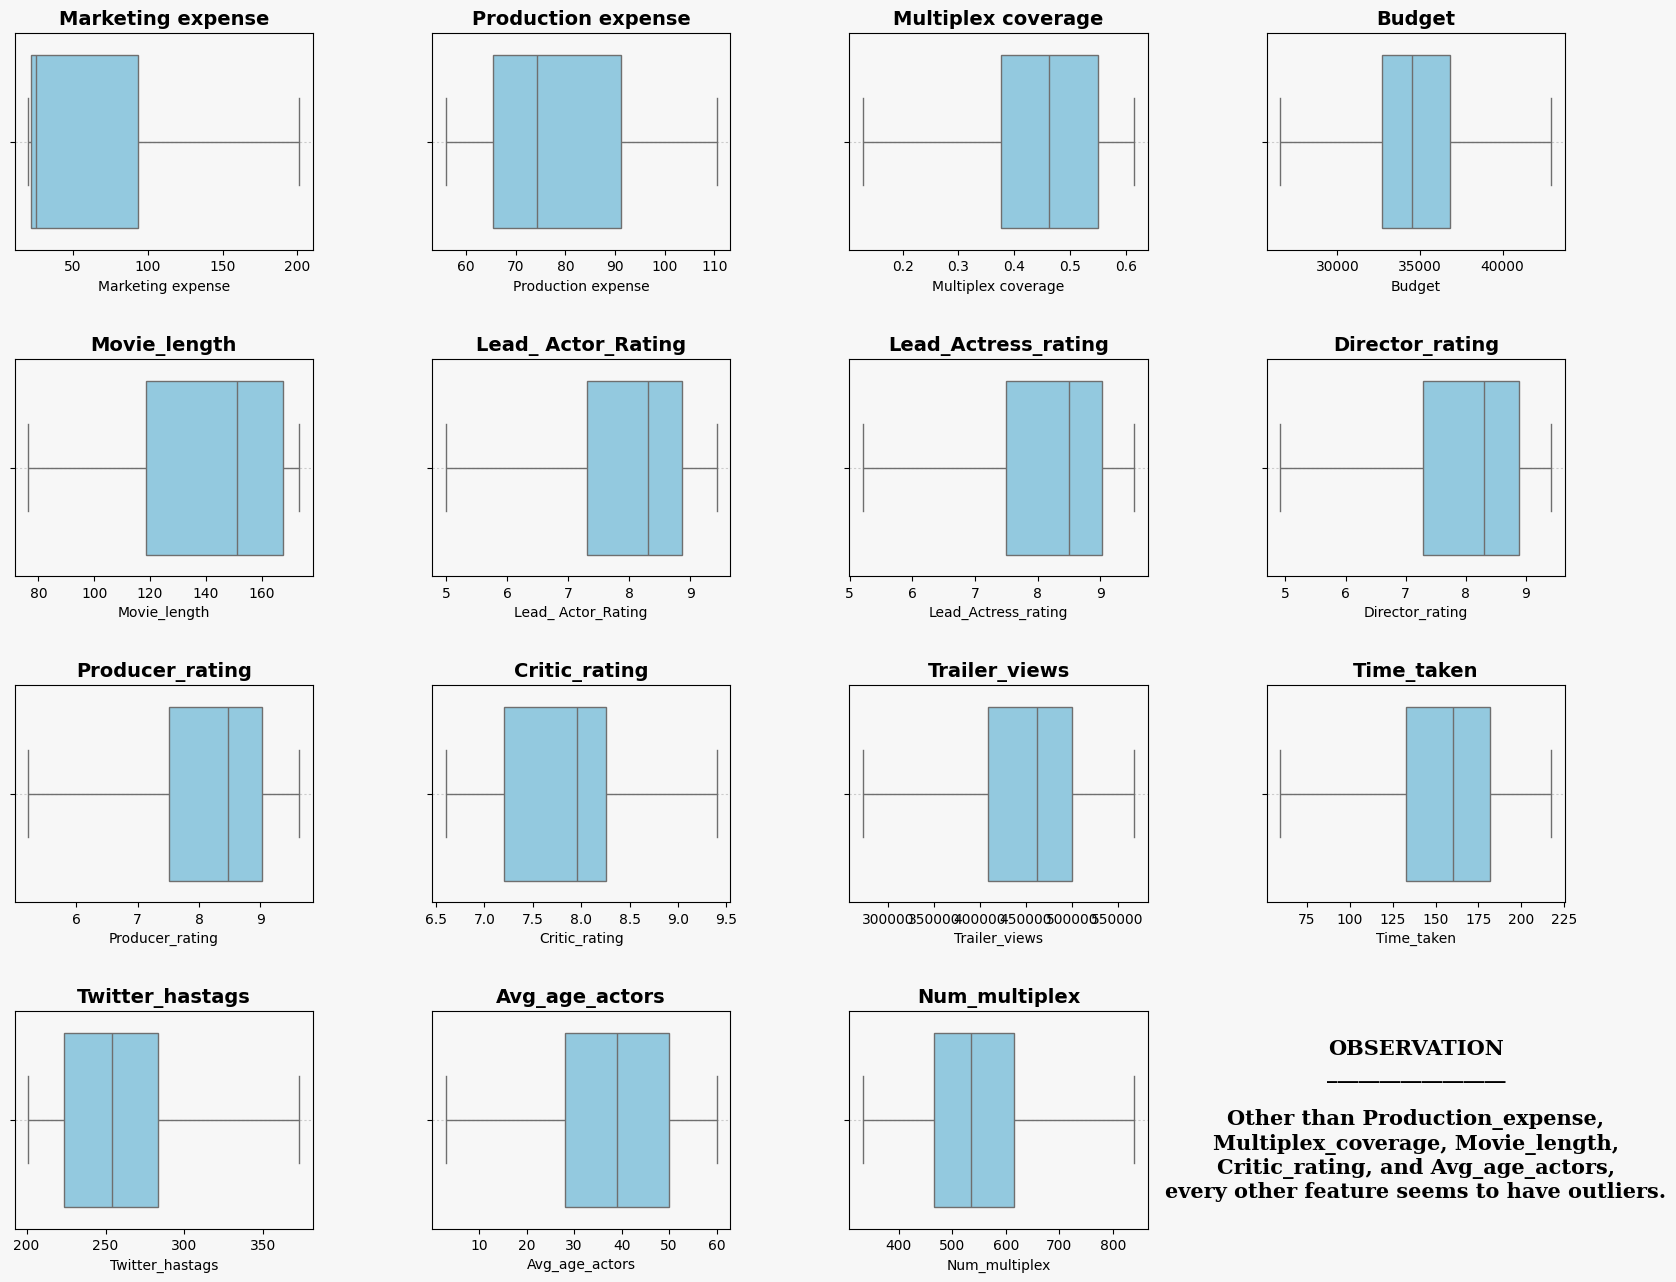

In [ ]:
# TREATING OUTLIERS
for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        lower_quatile = data[feature].quantile(0.25)
        upper_quatile = data[feature].quantile(0.75)
        IQR = upper_quatile-lower_quatile
        lower_fence = lower_quatile-(1.5*IQR)
        upper_fence = upper_quatile+(1.5*IQR)

        data[feature] = np.where(data[feature]>upper_fence, upper_fence, data[feature])
        data[feature] = np.where(data[feature]<lower_fence, lower_fence, data[feature])

# Create figure and subplots
fig = plt.figure(figsize=(20, 24))
spec = fig.add_gridspec(6, 4)
spec.update(wspace=0.4, hspace=0.5)

# Create subplots
subplots = [fig.add_subplot(spec[i, j]) for i in range(4) for j in range(4)]
bg_color = '#f7f7f7'

# Set background color
fig.patch.set_facecolor(bg_color)
for subplot in subplots:
    subplot.set_facecolor(bg_color)

# Plotting the graphs
cnt = 0
for feature in data:
    if data[feature].dtype=='O' or feature=='Collection':
        continue
    else:
        sns.boxplot(x=data[feature], ax=subplots[cnt], color='skyblue')
        subplots[cnt].set_title(feature, fontsize=14, weight='bold')
        subplots[cnt].grid(color='#cccccc', linestyle=':', linewidth=0.8, axis='y', zorder=0, dashes=(2, 2))
        cnt += 1

# Observation text
observation_text = ("OBSERVATION\n_________________\n\n"
                    "Other than Production_expense,\n"
                    "Multiplex_coverage, Movie_length,\n"
                    "Critic_rating, and Avg_age_actors,\n"
                    "every other feature seems to have outliers.")
subplots[-1].text(0.5, 0.5, observation_text, ha='center', va='center', size=15, family='serif', weight='bold')
subplots[-1].axis('off')

# Remove spines from the observation subplot (Negative Indexing)
subplots[-1].spines['top'].set_visible(False)
subplots[-1].spines['right'].set_visible(False)
subplots[-1].spines['bottom'].set_visible(False)
subplots[-1].spines['left'].set_visible(False)

# Display the plot
plt.show()

In [ ]:
# Transforming Categorical to Numerical Features
data = pd.get_dummies(data, drop_first=True)
data.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23.0,494.0,False,False,True,True
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42.0,462.0,False,True,False,False
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,147.88,372.846,38.0,458.0,True,False,False,False
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45.0,472.0,False,True,False,True
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55.0,395.0,False,True,False,False


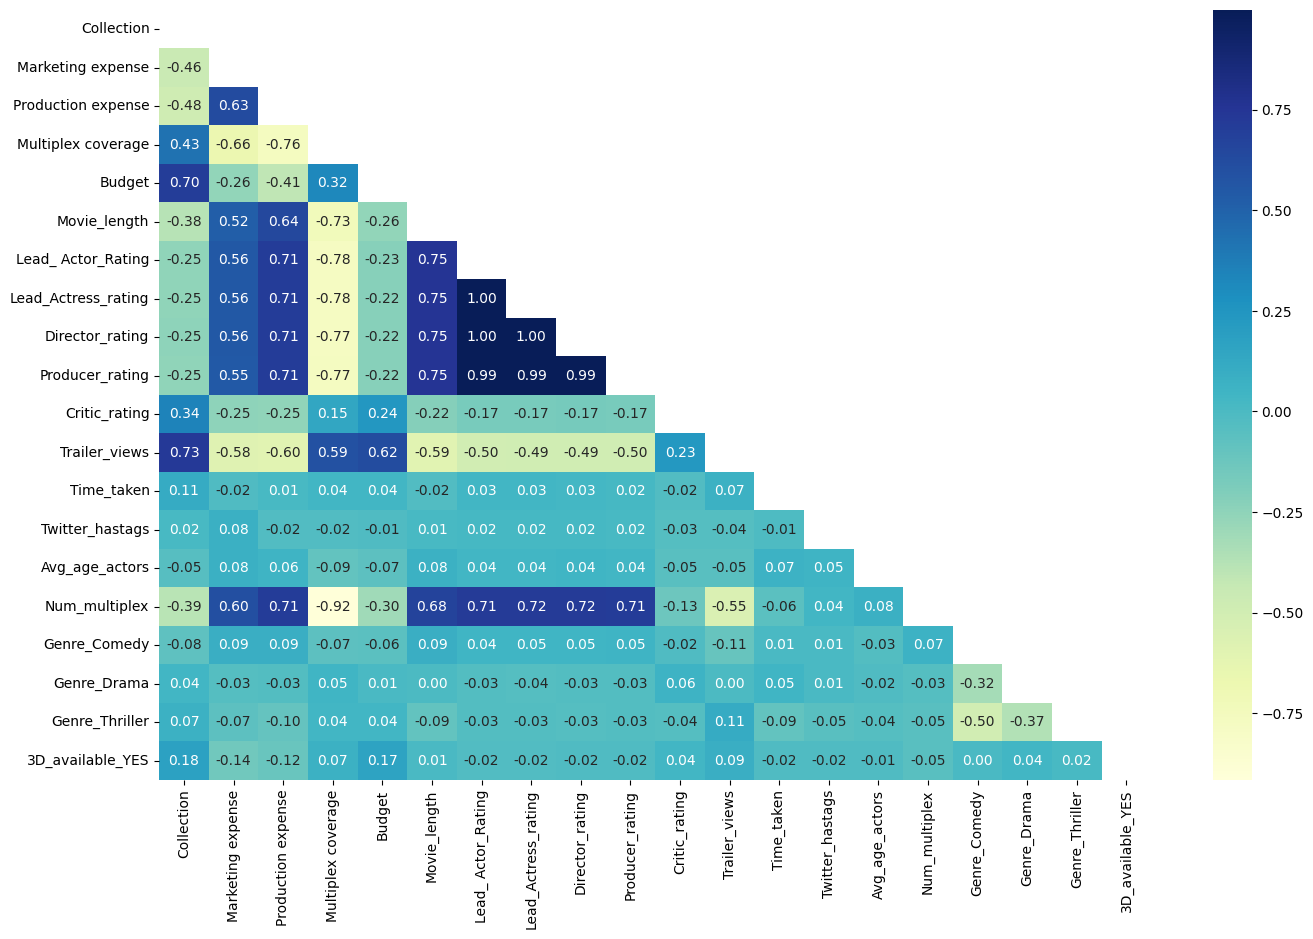

In [ ]:
# Heatmap for checking Multicolinearity
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(16, 10))
sns.heatmap(corr,
            annot=True,
            fmt='.2f',
            mask=mask,
            cmap='YlGnBu')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all data is numeric and handle missing values
data_cleaned = data.select_dtypes(include=[np.number]).dropna()

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Variable'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Initial VIF calculation
X = data_cleaned.drop(columns=['Collection'])  # Exclude target column if you have one
vif_df = calculate_vif(X)
print(vif_df)

# Remove variables with VIF > 10
threshold = 10
while True:
    high_vif_vars = vif_df[vif_df['VIF'] > threshold]['Variable']
    if high_vif_vars.empty:
        break
    X = X.drop(columns=high_vif_vars.iloc[0])  # Drop one variable at a time
    vif_df = calculate_vif(X)
    print(vif_df)

# Resulting dataframe with reduced multicollinearity
print("Final set of variables with reduced multicollinearity:")
print(X.columns)


               Variable           VIF
0     Marketing expense      4.260580
1    Production expense     91.496467
2    Multiplex coverage     57.830481
3                Budget    185.494700
4          Movie_length     76.985882
5    Lead_ Actor_Rating  18686.753629
6   Lead_Actress_rating  21620.510153
7       Director_rating  19188.610285
8       Producer_rating   6042.797855
9         Critic_rating    137.032709
10        Trailer_views    128.601711
11           Time_taken     29.721977
12      Twitter_hastags     55.906109
13       Avg_age_actors     11.011635
14        Num_multiplex    115.535893
               Variable           VIF
0     Marketing expense      3.979447
1    Multiplex coverage     56.901532
2                Budget    180.807665
3          Movie_length     76.126338
4    Lead_ Actor_Rating  18647.542106
5   Lead_Actress_rating  21495.460196
6       Director_rating  19158.405169
7       Producer_rating   6006.058905
8         Critic_rating    136.959347
9         Tr

In [ ]:
data.head()

,Collection,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.94,527367.0,109.60,223.840,23.0,False,False,True,True
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.44,494055.0,146.64,243.456,42.0,False,True,False,False
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.44,547051.0,147.88,372.846,38.0,True,False,False,False
3,66800,20.6474,59.36,0.542,38873.890,119.3,8.26,516279.0,185.36,225.344,45.0,False,True,False,True
4,72400,21.3810,59.36,0.542,39701.585,127.7,8.26,531448.0,176.48,225.792,55.0,False,True,False,False


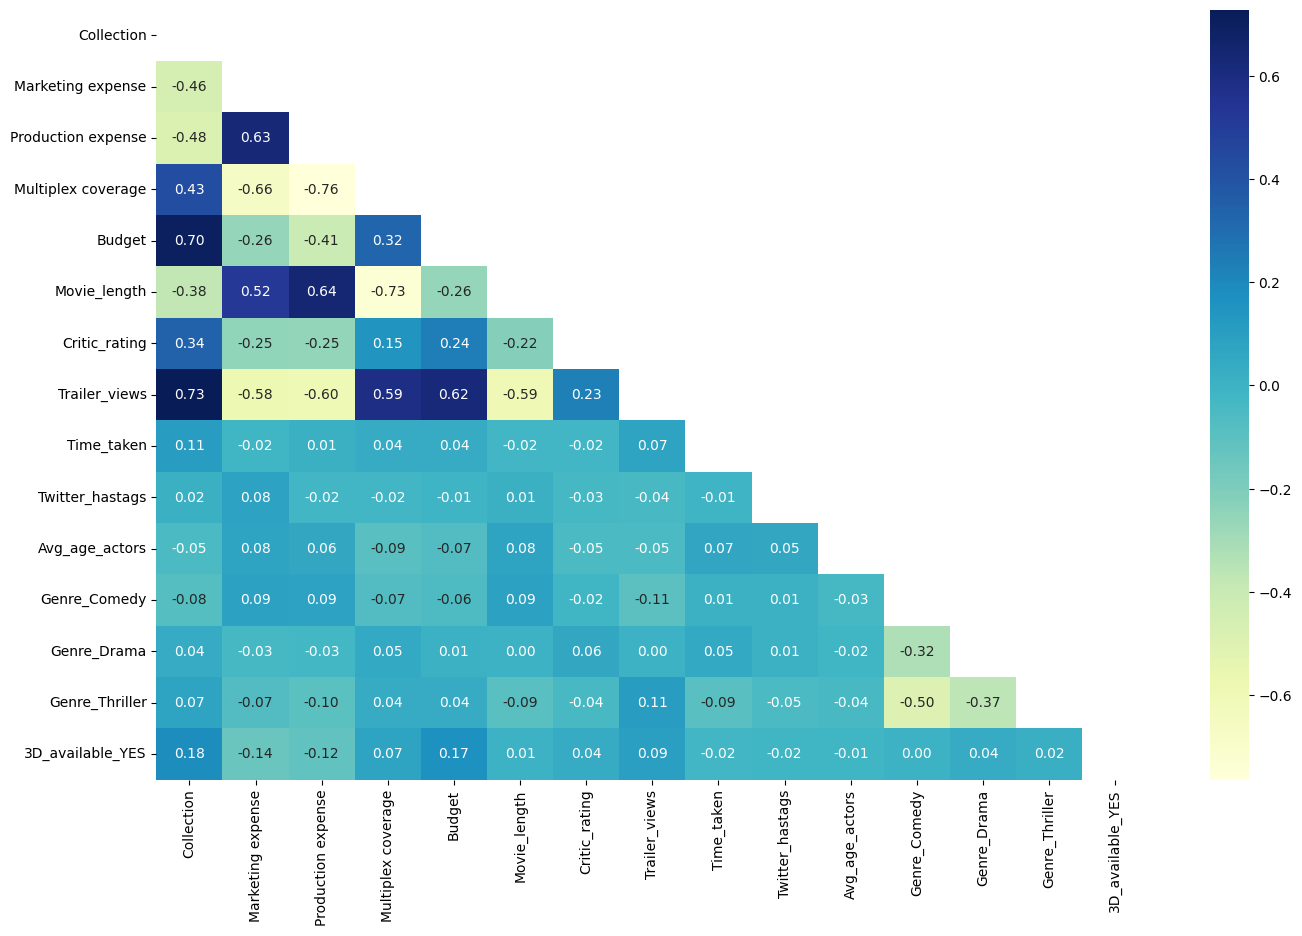

In [ ]:
# Heatmap after removing Multicolinearity
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr,
            annot=True ,
            fmt='.2f',
            mask=mask,
            cmap='YlGnBu')
plt.show()

In [ ]:
# Creating independent (X) and dependent (Y) dataset
X = data.drop('Collection',axis=1)
y = data['Collection']

# Checking the shape of the dataset
print(X.shape)
print(y.shape)

(506, 14)
(506,)


# Data Normalisation

In [ ]:
# Importing and scaling the data to standard normal distribution
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

# Checking the mean and standard deviation
mean = np.mean(X_scaled, axis=0)
std = np.std(X_scaled, axis=0)
print(f'mean: {int(mean[0]), int(mean[1])}')
print(f'Standard deviation: {int(std[0]), int(std[1])}')
x = pd.DataFrame(X_scaled, columns=X.columns)
x.head()

mean: (0, 0)
Standard deviation: (0, 0)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,0.000000,0.067815,0.685185,0.608570,0.641607,0.478571,0.863149,0.317286,0.132142,0.350877,0.0,0.0,1.0,1.0
1,0.002316,0.242302,0.827160,0.556402,0.782698,0.300000,0.750355,0.551605,0.246392,0.684211,0.0,1.0,0.0,0.0
2,0.002314,0.242302,0.827160,0.815210,0.599382,0.300000,0.929798,0.559450,1.000000,0.614035,1.0,0.0,0.0,0.0
3,0.002874,0.063050,0.849794,0.751863,0.441813,0.592857,0.825605,0.796552,0.140902,0.736842,0.0,1.0,0.0,1.0
4,0.006921,0.063050,0.849794,0.802337,0.528321,0.592857,0.876967,0.740376,0.143511,0.912281,0.0,1.0,0.0,0.0


In [ ]:
# Checking Statistical Significance
import statsmodels.api as sm
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:             Collection   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              711.9
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                   6.76e-316
Time:                        10:49:14   Log-Likelihood:                         -5405.6
No. Observations:                 506   AIC:                                  1.084e+04
Df Residuals:                     492   BIC:                                  1.090e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the model
lin_regressor = LinearRegression()
model = lin_regressor.fit(X_train, y_train)

# Cross-validation
mse = cross_val_score(lin_regressor, X, y, scoring='neg_mean_squared_error', cv=10)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluation metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, test_predictions)
mse = metrics.mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)

# Output results
print(f'R Squared for training dataset: {train_score:.4f}')
print(f'R Squared for testing dataset: {test_score:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

R Squared for training dataset: 0.6847
R Squared for testing dataset: 0.6066
Mean Absolute Error: 8070.7835
Mean Squared Error: 117802635.3497
Root Mean Squared Error: 10853.6922


* Model Performance: The model explains 68.47% of the variance in the training dataset and 60.66% in the testing dataset, indicating a moderate fit with some overfitting.
* Error Metrics: The average prediction error is 8070.78 units (MAE), with an RMSE of 10,853.69 units, showing the model's prediction errors are substantial but interpretable.
* Model Improvement: Reducing overfitting and optimizing feature selection could further enhance the model's performance and reduce prediction errors.
* Interpretability: Both MAE and RMSE are in the same units as the target variable, making them useful for understanding the average magnitude of prediction errors.

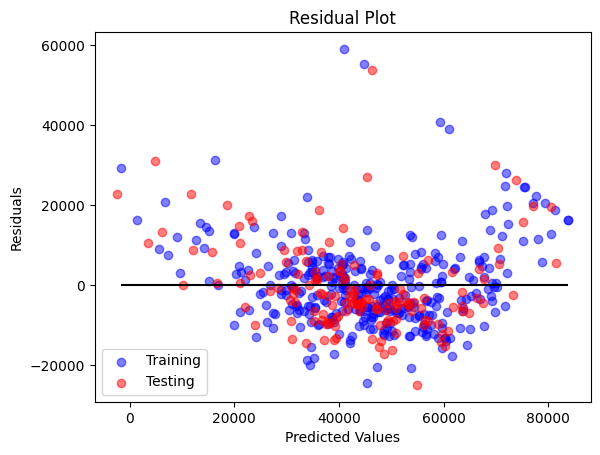

In [ ]:
# Plotting residuals for training and testing data
plt.scatter(train_predictions, y_train - train_predictions, color='blue', alpha=0.5, label='Training')
plt.scatter(test_predictions, y_test - test_predictions, color='red', alpha=0.5, label='Testing')
plt.hlines(y=0, xmin=min(train_predictions), xmax=max(train_predictions), color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.show()